In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [ ]:
uploaded_file = files.upload()

Saving crop_recommendation.csv to crop_recommendation.csv


In [ ]:
df = pd.read_csv('crop_recommendation.csv', encoding='utf-8')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

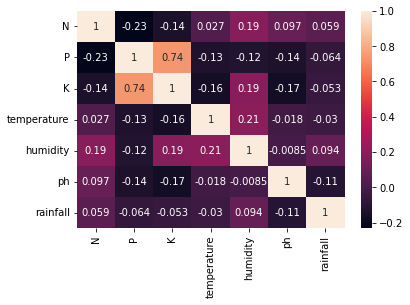

In [ ]:
sns.heatmap(df.corr(),annot=True)

##Seperating features and target label

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
test_acc = []
train_acc = []
testing_loss = []
training_loss = []
model = []

In [ ]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)

predicted_values1 = DecisionTree.predict(Xtrain)
training_accuracy = metrics.accuracy_score(Ytrain, predicted_values1)
train_acc.append(training_accuracy)
print("Decision Trees's Training Accuracy is: ", training_accuracy*100)

predicted_values2 = DecisionTree.predict(Xtest)
testing_accuracy = metrics.accuracy_score(Ytest, predicted_values2)
test_acc.append(testing_accuracy)
model.append('Decision Tree')
print("Decision Trees's Testing Accuracy is: ", testing_accuracy*100)

print(classification_report(Ytest,predicted_values2))


Decision Trees's Training Accuracy is:  88.18181818181819
Decision Trees's Testing Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00

##Cross Validation and Loss Function on Decision Tree

In [ ]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

## Saving trained Decision Tree model

In [ ]:
import os
import sys
import pickle
# Dump the trained Naive Bayes classifier with Pickle

DT_pkl_filename = os.path.abspath('DecisionTree.pkl')
# Open the file to save as pkl file
DT_Model_pkl = open(str(DT_pkl_filename), 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)

predicted_values1 = NaiveBayes.predict(Xtrain)
training_accuracy = metrics.accuracy_score(Ytrain, predicted_values1)
train_acc.append(training_accuracy)
print("Naive Bayes's Training Accuracy is: ", training_accuracy*100)

predicted_values2 = NaiveBayes.predict(Xtest)
testing_accuracy = metrics.accuracy_score(Ytest, predicted_values2)
test_acc.append(testing_accuracy)
model.append('Naive Bayes')
print("Naive Bayes's Testing Accuracy is: ", testing_accuracy*100)

print(classification_report(Ytest,predicted_values2))

Naive Bayes's Training Accuracy is:  99.60227272727272
Naive Bayes's Testing Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00    

##Cross Validation and Loss Function on Naive Bayes

In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

## Saving trained Guassian Naive Bayes model

In [ ]:
import os
import sys
import pickle
# Dump the trained Naive Bayes classifier with Pickle

NB_pkl_filename = os.path.abspath('NBClassifier.pkl')
# Open the file to save as pkl file
NB_Model_pkl = open(str(NB_pkl_filename), 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler #Data Normalization
norm = MinMaxScaler().fit(Xtrain) #Fit scaler on training data
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)

predicted_values1 = SVM.predict(X_train_norm)
training_accuracy = metrics.accuracy_score(Ytrain, predicted_values1)
train_acc.append(training_accuracy)
print("SVM's Training Accuracy is: ", training_accuracy*100)

predicted_values2 = SVM.predict(X_test_norm)
testing_accuracy = metrics.accuracy_score(Ytest, predicted_values2)
test_acc.append(testing_accuracy)
model.append("SVM")
print("SVM's Testing Accuracy: ", testing_accuracy*100)

print(classification_report(Ytest,predicted_values2))

SVM's Training Accuracy is:  99.54545454545455
SVM's Testing Accuracy:  97.95454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00  

##Cross Validation on SVM (Support Vector Machine)

In [ ]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

##Saving trained SVM model

In [ ]:
import os
import sys
import pickle
# Dump the trained Naive Bayes classifier with Pickle
SVM_pkl_filename = os.path.abspath('SVMClassifier.pkl')
# Open the file to save as pkl file
SVM_Model_pkl = open(str(SVM_pkl_filename), 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)

predicted_values1 = LogReg.predict(Xtrain)
training_accuracy = metrics.accuracy_score(Ytrain, predicted_values1)
train_acc.append(training_accuracy)
print("Logistic Regression's Training Accuracy is: ", training_accuracy*100)

predicted_values2 = LogReg.predict(Xtest)
testing_accuracy = metrics.accuracy_score(Ytest, predicted_values2)
test_acc.append(testing_accuracy)
model.append('Logistic Regression')
print("Logistic Regression's Testing Accuracy is: ", testing_accuracy*100)

print(classification_report(Ytest,predicted_values2))

Logistic Regression's Training Accuracy is:  97.38636363636364
Logistic Regression's Testing Accuracy is:  95.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmel

##Cross Validation on Logistic Regression

In [ ]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

## Saving trained Logistic Regression model

In [ ]:
import os
import sys
import pickle
# Dump the trained Naive Bayes classifier with Pickle

LR_pkl_filename = os.path.abspath('LogisticRegression.pkl')
# Open the file to save as pkl file
LR_Model_pkl = open(str(LR_pkl_filename), 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values1 = RF.predict(Xtrain)
training_accuracy = metrics.accuracy_score(Ytrain, predicted_values1)
train_acc.append(training_accuracy)
print("RF's Training Accuracy is: ", training_accuracy*100)

predicted_values2 = RF.predict(Xtest)
testing_accuracy = metrics.accuracy_score(Ytest, predicted_values2)
test_acc.append(testing_accuracy)
model.append('RF')
print("RF's Testing Accuracy is: ", testing_accuracy*100)

print(classification_report(Ytest,predicted_values2))

RF's Training Accuracy is:  100.0
RF's Testing Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
   

##Cross Validation on Random Forest

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

## Saving trained Random Forest model

In [ ]:
import os
import sys
import pickle
# Dump the trained Naive Bayes classifier with Pickle

RF_pkl_filename = os.path.abspath('RandomForest.pkl')
# Open the file to save as pkl file
RF_Model_pkl = open(str(RF_pkl_filename), 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain_encoded = le.fit_transform(Ytrain)
Ytest_encoded = le.fit_transform(Ytest)
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain_encoded)

predicted_values1 = XB.predict(Xtrain)
training_accuracy = metrics.accuracy_score(Ytrain_encoded, predicted_values1)
train_acc.append(training_accuracy)
print("XGBoost's Training Accuracy is: ", training_accuracy*100)

predicted_values2 = XB.predict(Xtest)
testing_accuracy = metrics.accuracy_score(Ytest_encoded, predicted_values2)
test_acc.append(testing_accuracy)
model.append('XGBoost')
print("XGBoost's Testing Accuracy is: ", testing_accuracy*100)

print(classification_report(Ytest_encoded,predicted_values2))

XGBoost's Training Accuracy is:  100.0
XGBoost's Testing Accuracy is:  99.31818181818181
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00   

## Saving trained XGBoost model

In [ ]:
import os
import sys
import pickle
# Dump the trained Naive Bayes classifier with Pickle

XB_pkl_filename = os.path.abspath('XGBoost.pkl')
# Open the file to save as pkl file
XB_Model_pkl = open(str(XB_pkl_filename), 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Testing Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

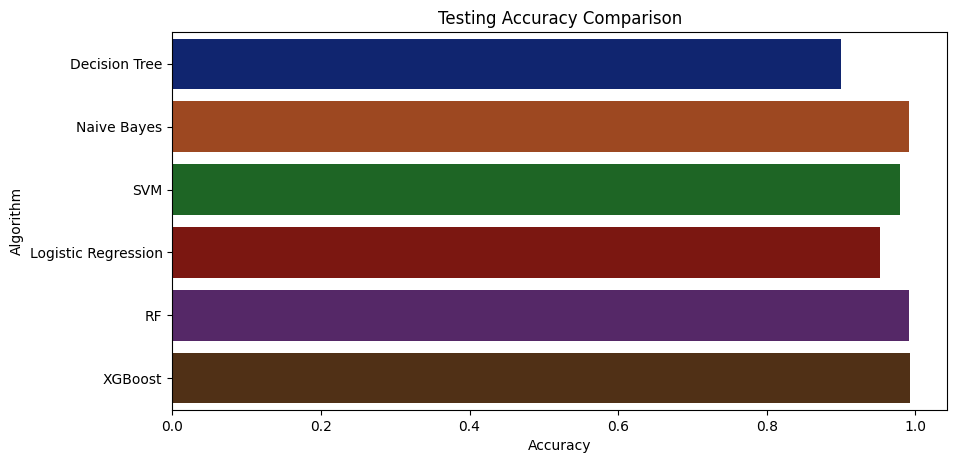

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Testing Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = test_acc,y = model,palette='dark')

##Training and Testing accuracy comparison

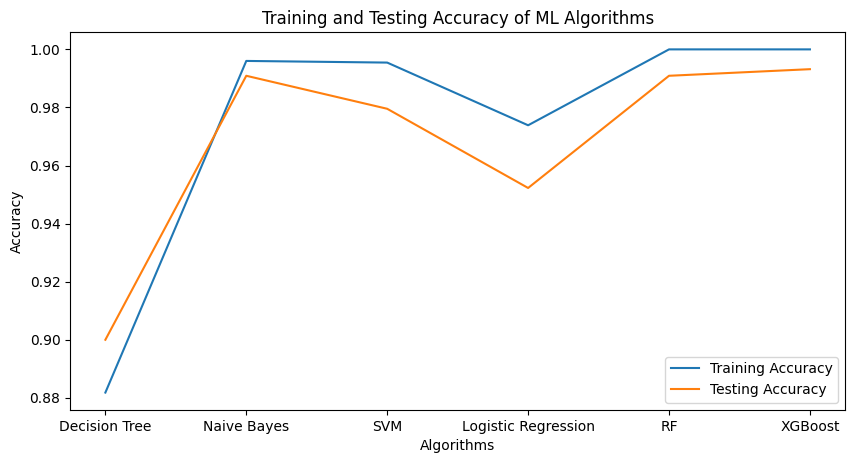

In [ ]:
fig, ax = plt.subplots(figsize=[10,5],dpi = 100)
ax.plot(model, train_acc, label='Training Accuracy')
ax.plot(model, test_acc, label='Testing Accuracy')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy of ML Algorithms')
ax.legend()
plt.show()

##Training and testing loss comparison

In [ ]:
# fig, ax = plt.subplots(figsize=[10,5],dpi = 100)
# ax.plot(model, train_loss, label='Training Loss')
# ax.plot(model, test_loss, label='Testing Loss')
# ax.set_xlabel('Algorithms')
# ax.set_ylabel('Loss')
# ax.set_title('Training and Testing Loss of ML Algorithms')
# ax.legend()
# plt.show()

##Printing training and testing accuracy

In [ ]:
training_accuracy_models = dict(zip(model, train_acc))
print('Training Accuracy\n')
for k, v in training_accuracy_models.items():
    print (k, '-->', v*100)
    
testing_accuracy_models = dict(zip(model, test_acc))
print('\nTesting Accuracy\n')
for k, v in testing_accuracy_models.items():
    print (k, '-->', v*100)

Training Accuracy

Decision Tree --> 88.18181818181819
Naive Bayes --> 99.60227272727272
SVM --> 99.54545454545455
Logistic Regression --> 97.38636363636364
RF --> 100.0
XGBoost --> 100.0

Testing Accuracy

Decision Tree --> 90.0
Naive Bayes --> 99.0909090909091
SVM --> 97.95454545454545
Logistic Regression --> 95.22727272727273
RF --> 99.0909090909091
XGBoost --> 99.31818181818181


## Making a prediction

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
predicted_label_encoded = XB.predict(data)
predicted_label = le.inverse_transform(predicted_label_encoded)
print(predicted_label[0])

coffee


In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
predicted_label_encoded = XB.predict(data)
predicted_label = le.inverse_transform(predicted_label_encoded)
print(predicted_label[0])

jute
